# Anegada passage crossings

plot the anagada passage crossings from the gridded data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.signal import find_peaks
import numpy as np

from RU29_helpers import grid_glider

In [2]:
dataid = 'ru29-20200908T1623-profile-sci-rt'

ru29 = grid_glider(dataset_id= dataid)

/Users/beaird/anaconda3/envs/fm2020/lib/python3.8/site-packages/scipy/stats/_binned_statistic.py:631: RuntimeWarning: Mean of empty slice
  result[vv, i] = statistic(values[vv, binnumbers == i])
/Users/beaird/anaconda3/envs/fm2020/lib/python3.8/site-packages/scipy/stats/_binned_statistic.py:631: RuntimeWarning: Mean of empty slice
  result[vv, i] = statistic(values[vv, binnumbers == i])


In [3]:
ru29

<xarray.Dataset>
Dimensions:                (date: 1090, depth: 199)
Coordinates:
  * date                   (date) datetime64[ns] 2020-09-08T16:45:31.84337305...
  * depth                  (depth) float64 2.5 7.5 12.5 ... 982.5 987.5 992.5
    lat                    (date) float64 18.18 18.18 18.18 ... 18.16 18.16
    lon                    (date) float64 -64.8 -64.81 -64.8 ... -64.79 -64.79
Data variables:
    u                      (date) float64 nan nan nan ... 0.002537 nan -0.03963
    v                      (date) float64 nan nan nan ... -0.01012 nan 0.01019
    potential_temperature  (depth, date) float64 nan nan nan nan ... nan nan nan
    salinity               (depth, date) float64 nan nan nan nan ... nan nan nan
    cdom                   (depth, date) float64 nan nan nan nan ... nan nan nan
    chlorophyll_a          (depth, date) float64 nan nan nan nan ... nan nan nan
    beta_700nm             (depth, date) float64 nan nan nan nan ... nan nan nan

# calc derived quantities
do density
maybe also just do geostrophic velocity for all, then split sections later

In [ ]:
# need to fill nans for the hydro & u,v if doing geo
# need cross-track dir and DAC component

In [4]:
prom = .05


Nends, propN = find_peaks(ru29.lat,  
                          threshold=None, distance=None, prominence=prom)
Sends, prop = find_peaks( -1*ru29.lat,  
                         threshold=None, distance=None, prominence=prom)


sections = np.sort(np.append(Nends, Sends ))
Nends

array([184, 361, 429, 539, 588, 634, 682, 726, 774, 820, 867, 913, 958])

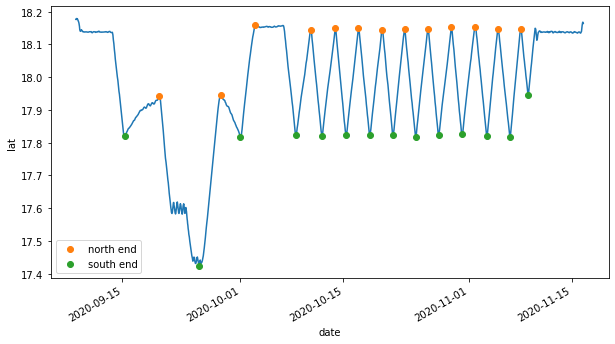

In [5]:
plt.figure( figsize=(10,5))
ru29.lat.plot()

plt.plot(ru29.date[Nends] , ru29.lat[Nends], 'o', label='north end' )
plt.plot(ru29.date[Sends] , ru29.lat[Sends], 'o' , label='south end')
plt.legend()

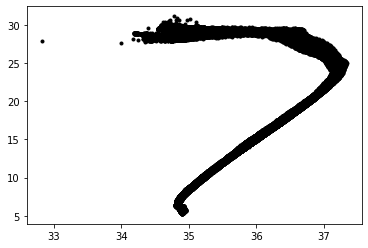

In [6]:
plt.plot(ru29.salinity, ru29.potential_temperature, 'k.');

(18550.0, 18557.0)

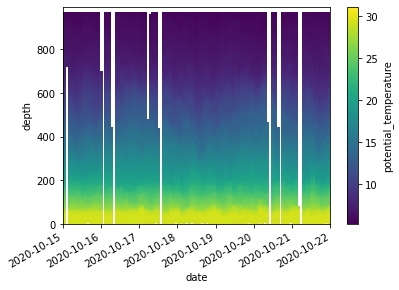

In [7]:
ru29.potential_temperature.plot()
plt.xlim(['2020-10-15', '2020-10-22'])

# plot Anagada passage sections

Break up and plot sections from the gridded glider data. 

Note: there are some missing ctd data in these real-time datasets. kinda a lot actually

<ipython-input-10-40a3c944ae72>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


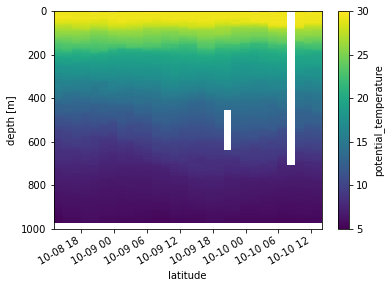

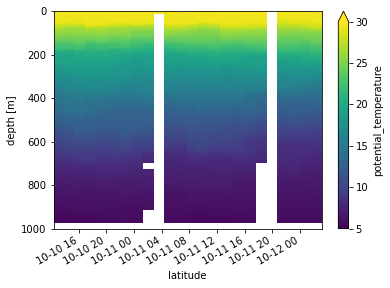

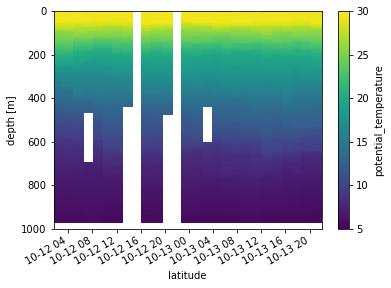

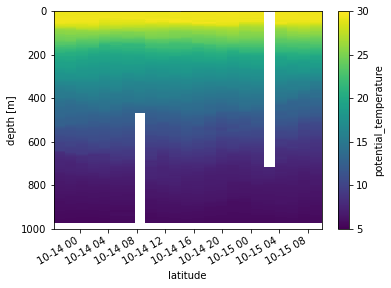

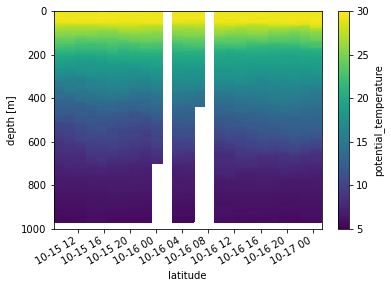

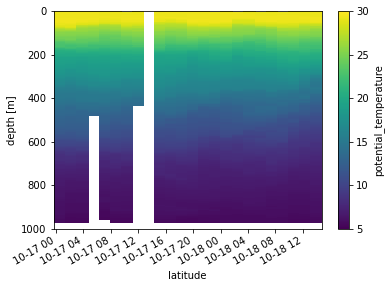

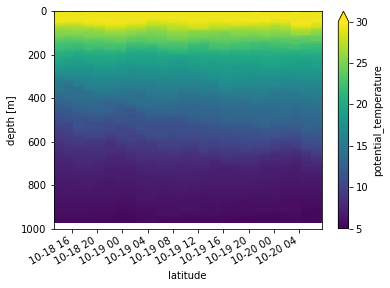

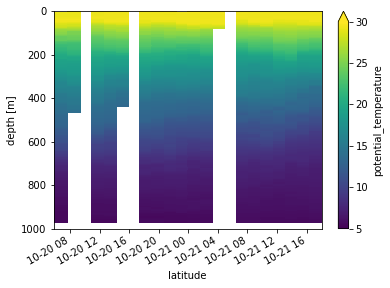

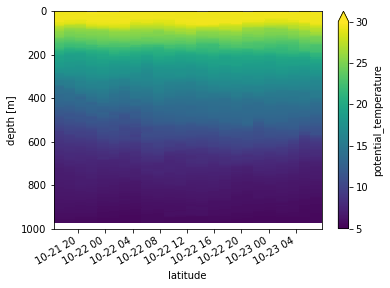

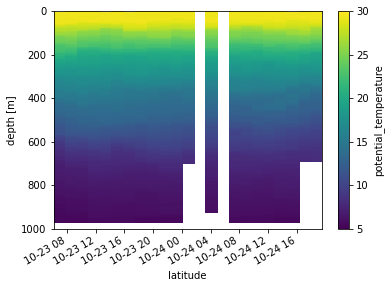

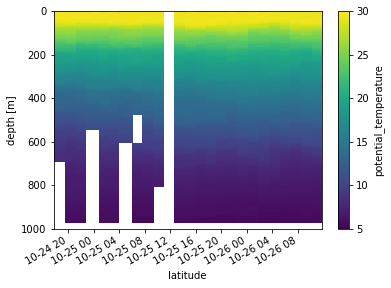

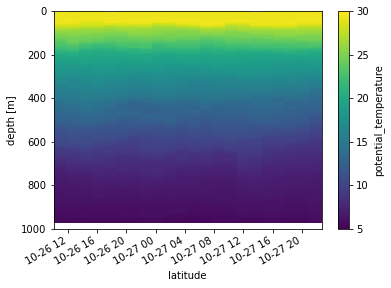

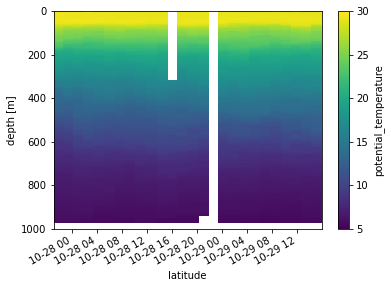

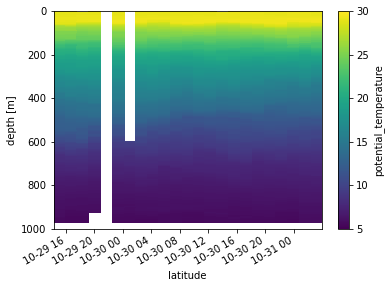

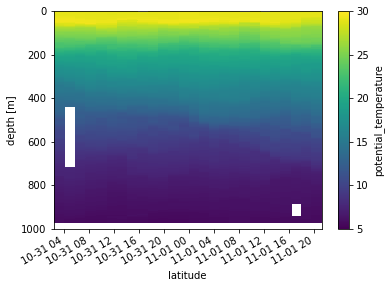

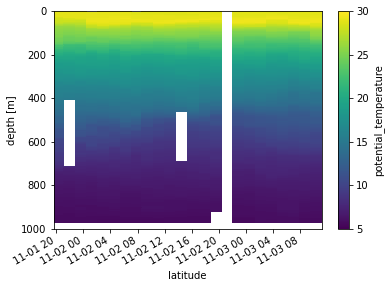

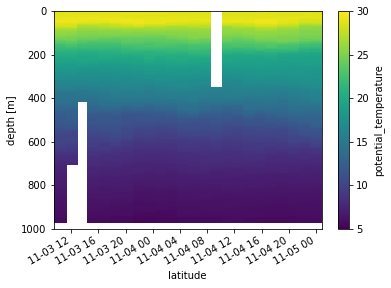

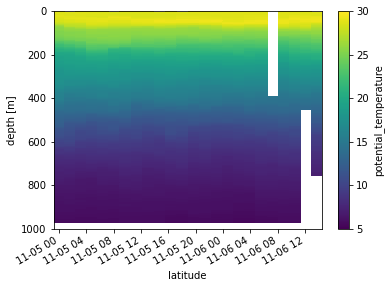

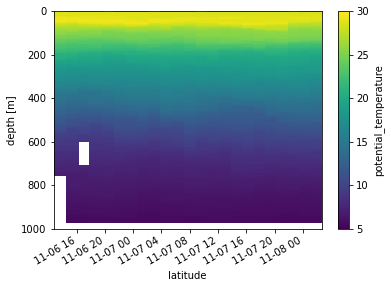

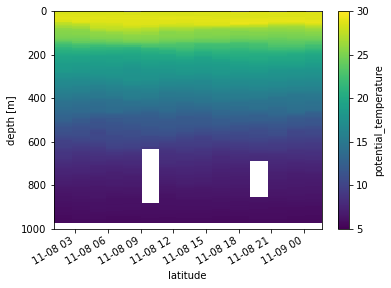

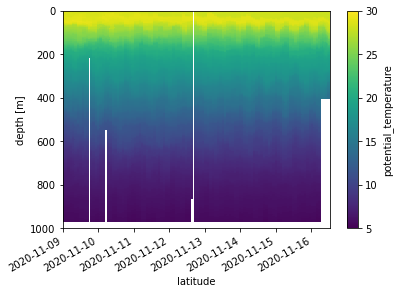

In [10]:
# I haven't worked to ID the first sectons well
# just going to plot the ones where the ID works well for now
good_section_id = sections[6:] 

for counter, value in enumerate(good_section_id):
    
    # get just this section
    if counter < len(good_section_id)-1:
        sec = ru29.sel( date = slice(ru29.date[ good_section_id[counter] ], 
                                    ru29.date[ good_section_id[counter+1] ]))
        
    else: #if your at the last one, just slice to the end
        sec = ru29.sel( date = slice(ru29.date[ good_section_id[counter] ], 
                                    ru29.date[-1 ]))
        
    
    plt.figure()
#     plt.pcolormesh( sec.lat, sec.depth, sec.potential_temperature, vmin=5, vmax=30)
#     plt.contour( sec.lat, sec.depth, sec.salinity, colors='k')

#     plt.pcolormesh( sec.date, sec.depth, sec.potential_temperature, vmin=5, vmax=30)
#     plt.contour( sec.date, sec.depth, sec.salinity, colors='k')
    sec.potential_temperature.plot(vmin=5, vmax=30)
#     plt.colorbar()
    plt.ylim([1000, 0])
    plt.ylabel('depth [m]')
    plt.xlabel('latitude')

# create a dict of sections, maybe?

words = defaultdict(list)
for word in nouns:
    words[word[0]].append(word)

In [12]:
len(good_section_id)

18

(18575.0, 18577.0)

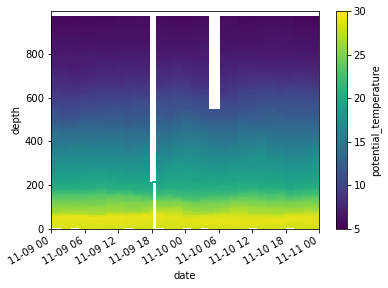

In [13]:
sec.potential_temperature.plot(vmin=5, vmax=30)
plt.xlim(['2020-11-9', '2020-11-11'])